<a id = 'top'></a>
# Final Portfolio 

By Mairead Heiger, with assistance from Mariya Savinov, Meghan Cilento, Helena Richie, and Frank Messina, at the University of Pittsburgh for PHYS 1321: Computational Methods in Physics, Fall 2018.

- #### [Checkpoint 01](#cp1): Electron Energy Levels
  - [`energy(Z, n)`](#energy)
      - [with assertion error](#assert)
  - [`levels(Zmin, Zmax, nmin, nmax)`](#levels)
      - [formatted table](#table)
      - [write to file](#file)
- #### [Checkpoint 02](#cp2): Electric Potential
    - [`potential1d(r, q)`](#potential1d)
    - [`potential2d(x, y, q, x0, y0)`](#potential2d)
        - [Plot of 2-D potential](#V_plot)
- #### [Checkpoint 03](#cp3): Waves in 2-D
    - [`wave(t, z0, k, w)`](#wavefunc)
        - [Plot of wave with variable `z0`, `k`, `w`](#wavegui)
        - [Animation of wave in real time](#waveanim)
- #### [Checkpoint 04](#cp4): Electric Fields of a Charge Distribution
    - [`simps2d(f, L)`](#simps2d)
    - [`potential(sigma, x, y)`](#potential) 
    - [Electric field, potential, and charge distribution](#potplot)
- #### [Checkpoint 05](#cp5): Eigenfrequencies
- #### [Checkpoint 06](#cp6): Lagrange Points
    - [`potential(x, y)`](#potem)
    - [`mag_f(xy)`](#magf)
    - [Lagrange points](#lagrange)
- #### [Checkpoint 07](#cp7): Fourier Transforms of Sound
    - [Trumpet](#trumpet)
    - [Star Wars Theme](#starwars)
- #### [Checkpoint 08](#cp8): Double Pendulum
    - [Equations of Motion for Double Pendulum](#pendode)
    - [Pendulum Energy](#penden)
    - [Animation of Double Pendulum](#pendan)
- #### [Checkpoint 09](#cp9): Standing Waves on a String
    - [Damped wave](#dampedwave)
    - [Time dependent driving](#timedep)
- #### [Checkpoint 10](#cp10): Ising Model
    - [At T = 1](#t1)
    - [At T = 2](#t2)
    - [At T = 3](#t3)

Contact meh187@pitt.edu with questions, comments, or problems.

In [1]:
# imports
import numpy as np
from random import randint
import random
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython import display
from matplotlib.animation import FuncAnimation
from IPython.display import HTML 
from scipy.integrate import odeint
import scipy.integrate as integrate
import scipy.linalg as linalg
import scipy.optimize as optimize
import scipy.fftpack as fftpack
from scipy.io.wavfile import read as wavread
from scipy.linalg import solve_banded
from scipy.fftpack import dst, idst

# graph formatting
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['figure.figsize'] = 7, 5

<a id='cp1'></a>

# Checkpoint 1: Electron Energy Levels

The energy levels of a single electron atom can be approximated using the formula
$$E_n=-(13.6\ \mbox{eV})\,\frac{Z^2}{n^2}\,,$$
where $Z$ is the atomic number, and $n$ is the principle quantum number (e.g. $n=1$ is the ground state).

<a id='energy'></a>

<font size="3"> The following function `energy(Z, n)` returns the energy of an electron in units of eV. </font>

In [2]:
def energy(Z, n):
    return -13.6*Z**2/n**2

<a id='assert'></a>

<font size = '3'> The modification of `energy(Z, n)` below returns the energy of an electron in units of eV and raises an `AssertionError` if `Z` and `n` are not both positive integers. </font>

In [3]:
def energy(Z, n):
    assert int(Z) == Z and int(n) == n and Z > 0 and n > 0, "Invalid input"
    return -13.6*Z**2/n**2

<a id='levels'></a>

<font size = '3'> The function `levels(Zmin, Zmax, nmin, nmax)` calls `energy(Z, n)` for a range of values of `Z` and `n` and prints a table. The ranges of `Z` (`Zmin` to `Zmax`) and n (`nmin` to `nmax`) are inclusive. </font>

In [4]:
def levels(Zmin, Zmax, nmin, nmax):
    for z in range(Zmin, Zmax+1, 1):           # for each Z in the range Zmin to Zmax
        
        zline = []                             # define an empty list
        
        for n in range(nmin, nmax+1, 1):       # for each n at each Z, calculate the energy and append it to a list
            
            zline.append(energy(z, n))
            
        st = ' '.join(str(i) for i in zline)   # make a table with rows n and columns Z
        
        print(st)                              # print the table

<a id='table'></a>

<font size = '3'>The following is a modification of `levels` that outputs a formatted table. </font>

In [5]:
def levels(Zmin, Zmax, nmin, nmax):
    
    print(f" Z      ", end = " ")             # format the header
    for n in range(nmin, nmax+1):
        n = int(n)
        print(f"n = {n}      ", end = " ")
    print()
    
    znline = []                               # define an empty list in which to append energies
    
    for z in range(Zmin, Zmax+1, 1):          # calculate the energies at each level n for each Z and appends those values to znline
        zline = [int(z)]
        for n in range(nmin, nmax+1, 1):
            zline.append(energy(z, n))
        znline.append(zline)
        
    for i in znline:                          # break up the data by z (row) and n (column) and format the table
        for j in i:
            if type(j)==int:
                print(f"{j:2d}", end = " ")
            else:
                print(f"{j:11.2f}", end=" ")
        print()

An example output of `levels` using random ranges of `Z` and `n`.

In [6]:
Zmin = randint(2, 5)
Zmax = randint(11, 13)
nmin = randint(2, 4)
nmax = randint(6, 7)
levels(Zmin, Zmax, nmin, nmax)

 Z       n = 4       n = 5       n = 6       n = 7       
 5      -21.25      -13.60       -9.44       -6.94 
 6      -30.60      -19.58      -13.60       -9.99 
 7      -41.65      -26.66      -18.51      -13.60 
 8      -54.40      -34.82      -24.18      -17.76 
 9      -68.85      -44.06      -30.60      -22.48 
10      -85.00      -54.40      -37.78      -27.76 
11     -102.85      -65.82      -45.71      -33.58 
12     -122.40      -78.34      -54.40      -39.97 


<a id='file'></a>

<font size = '3'> The following is a modification of `levels` that writes the values to a file called `energy_levels.txt`. </font>

In [7]:
def levels(Zmin, Zmax, nmin, nmax):
    with open('energy_levels.txt', 'w') as file:           # open file "energy_levels.txt"
        file.write(" {:7}".format("Z"))                    # format the header
        for n in range(nmin, nmax+1):
            n = int(n)
            file.write("{:11}".format("n = " + str(n)))
        file.write("\n")
        
        znline = []                                        # define an empty list in which to append energies
        
        for z in range(Zmin, Zmax+1, 1):                   # calculate the energy at each level n for each Z and append those values to znline
            zline = [int(z)]
            for n in range(nmin, nmax+1, 1):
                zline.append(energy(z, n))
            znline.append(zline)
            
        for i in znline:                                   # break up the data by z (row) and n (column), format each line, and write it to the file
            for j in i:
                if type(j)==int:                           # format the data one way if it is a header; write it to file
                    file.write(f"{j:2d}")
                else:
                    file.write(f"{j:11.2f}")               # format it another way if it is an energy value; write it to file
            file.write("\n")

<font size = '3'> An example of `levels` with `Zmin=1`, `Zmax=92`, `nmin=1`, and `nmax=10`. </font>

In [8]:
levels(1, 92, 1, 10)
with open("energy_levels.txt") as file:
    print(file.read())

 Z      n = 1      n = 2      n = 3      n = 4      n = 5      n = 6      n = 7      n = 8      n = 9      n = 10     
 1     -13.60      -3.40      -1.51      -0.85      -0.54      -0.38      -0.28      -0.21      -0.17      -0.14
 2     -54.40     -13.60      -6.04      -3.40      -2.18      -1.51      -1.11      -0.85      -0.67      -0.54
 3    -122.40     -30.60     -13.60      -7.65      -4.90      -3.40      -2.50      -1.91      -1.51      -1.22
 4    -217.60     -54.40     -24.18     -13.60      -8.70      -6.04      -4.44      -3.40      -2.69      -2.18
 5    -340.00     -85.00     -37.78     -21.25     -13.60      -9.44      -6.94      -5.31      -4.20      -3.40
 6    -489.60    -122.40     -54.40     -30.60     -19.58     -13.60      -9.99      -7.65      -6.04      -4.90
 7    -666.40    -166.60     -74.04     -41.65     -26.66     -18.51     -13.60     -10.41      -8.23      -6.66
 8    -870.40    -217.60     -96.71     -54.40     -34.82     -24.18     -17.76     -13.60

<font size = '4'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

<a id='cp2'></a>

# Checkpoint 2: Plotting Electric Potential

The electric potential $V$ of a point charge $q$ as measured at a radial distance $r$ away from it is given by
$$V=k\frac{q}{r}\,,$$
where $V$ has units of volts and $k=8.99\times10^{9}$ V$\cdot$m$\cdot$C$^{-1}$ is the electrostatic constant.


<a id = 'potential1d'></a>
<font size = 3>The function `potential1D(r, q)` returns the value of $V$ (in volts) at distance $r$ (meters), given a point charge $q$ (Coulombs) at the origin. A plot of $V(r)$ for $0\le r\le 10$ and $q=-1\times10^{-9}$ is displayed.</font>

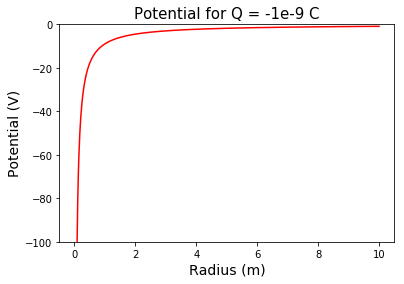

In [9]:
def potential1D(r, q):
    k = 8.99*1e9
    return k*q/r

np.seterr(all = 'ignore')
r = np.linspace(0, 10, 1000)

plt.plot(r, potential1D(r, -1e-9), 'r-')
plt.ylim(-100, 0)
plt.xlabel('Radius (m)'); plt.ylabel('Potential (V)')
plt.title('Potential for Q = -1e-9 C')

plt.show()

In two dimensions, for a point charge $q$ at $(x_0, y_0)$, the electric potential is:
$$V(x,y)=k\frac{q}{\sqrt{(x-x_0)^2+(y-y_0)^2}}\,.$$

<a id = 'potential2d'></a>
<font size = 3>The function `potential2D` returns $V(x,y)$, given point charge $q$ at $(x_0, y_0)$.</font>

In [10]:
def potential2D(x, y, q, x0, y0):
    k = 8.99*1e9
    return k*q/np.sqrt((x - x0)**2 + (y - y0)**2)

The voltage, for $0\le x\le1$ and $0\le y\le1$, $q=1\times10^{-9}$, and $(x_0, y_0) = (0.5, 0.5)$, is calculated and plotted, with contours every 10 volts, a maximum voltage of 100 V, and a minimum voltage of -100 V.

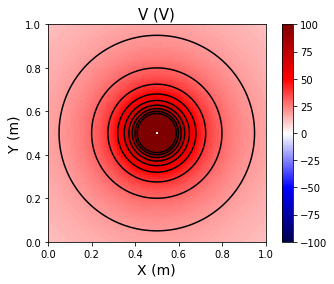

In [11]:
# parameters and initial conditions
x, y = np.meshgrid(np.linspace(0, 1, 101), np.linspace(0, 1, 101))
q = 1e-9
x0, y0 = 0.5, 0.5

# calculation of potential
V = potential2D(x, y, q, x0, y0)

# plot
plt.imshow(V, cmap = 'seismic', origin = 'lower', vmin = -100, vmax = 100, extent = (0, 1, 0, 1))
plt.colorbar()
plt.contour(V, colors = 'k', vmin = -100, vmax = 100, levels = np.arange(-110, 110, 10), extent = (0, 1, 0, 1))
plt.xlabel('X (m)'); plt.ylabel('Y (m)')
plt.title('V (V)')
plt.show()

The electric potential obeys the Principle of Superposition, so the electric potential for multiple charges is given by the sum of the potentials from each point charge.

<a id = 'V_plot'></a>

<font size = '3'>The function `V_plot(q1, x1, y1, q2, x2, y2, q3, x3, y3)` takes three point charges— q1  at  (x1,y1) , etc.—and creates a 2-D plot as above.</font>

In [12]:
def V_plot(q1, x1, y1, q2, x2, y2, q3, x3, y3):
    
    # initialize grid
    x, y = np.meshgrid(np.linspace(0, 1, 101), np.linspace(0, 1, 101))
    
    # calculate potential
    V = potential2D(x, y, q1, x1, y1) + potential2D(x, y, q2, x2, y2) + potential2D(x, y, q3, x3, y3)
    
    # plot
    plt.imshow(V, cmap = 'seismic', origin = 'lower', vmin = -100, vmax = 100, extent = (0, 1, 0, 1))
    plt.colorbar()
    plt.contour(V, colors = 'k', vmin = -100, vmax = 100, levels = np.linspace(-100, 100, 20), extent = (0, 1, 0, 1))
    plt.plot(x1, y1, 'wo', x2, y2, 'wo', x3, y3, 'wo')
    
    plt.xlabel('X (m)'); plt.ylabel('Y (m)')
    plt.title('V (V)')
    plt.show()

An example of the output of `V_plot` for three random charges and initial positions.

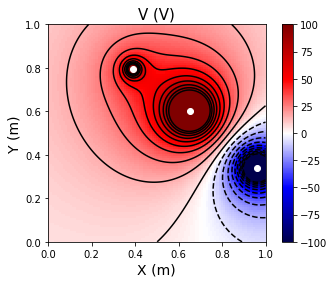

In [13]:
q1 = random.uniform(-2e-9, 2e-9)
q2 = random.uniform(-2e-9, 2e-9)
q3 = random.uniform(-2e-9, 2e-9)
x1 = random.uniform(0, 1)
x2 = random.uniform(0, 1)
x3 = random.uniform(0, 1)
y1 = random.uniform(0, 1)
y2 = random.uniform(0, 1)
y3 = random.uniform(0, 1)

V_plot(q1, x1, y1, q2, x2, y2, q3, x3, y3)

<font size = '4'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

<a id='cp3'></a>

# Checkpoint 3: Waves in 2-D

The equation
$z(x,y) = z_0\sin\Big(k\sqrt{x^2+y^2}-\omega t\Big)$
describes a circular set of waves centered at the origin that propagate outwards as time progresses. 

<a id = 'wavefunc'></a>

<font size = 3> The function `wave(t, z0, k, w)` returns $z$ (as a 2-D array). </font>

In [14]:
def wave(t, z0, k, w):
    xval = np.linspace(-5, 5, 200)
    yval = np.linspace(-5, 5, 200)
    x, y = np.meshgrid(xval, yval)
    return z0*np.sin(k*np.sqrt(x**2 + y**2) - w*t)

Below is a plot of `wave` for $z_0, \ k, \ \omega = 0$ at $t = 0$.

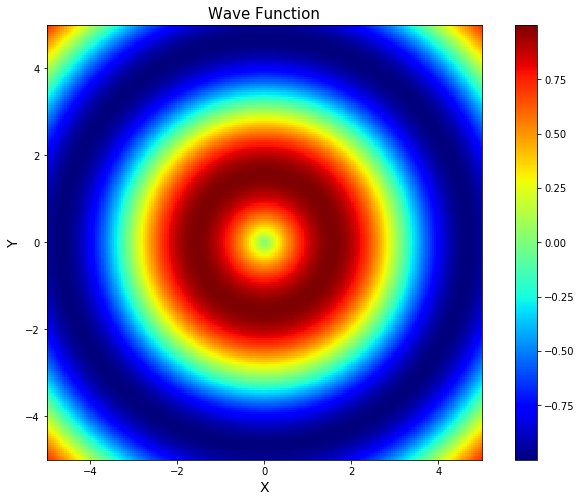

In [15]:
plt.figure(figsize = (12, 8))
plt.imshow(wave(0, 1, 1, 1), origin = 'lower', extent=(-5, 5, -5, 5), cmap = 'jet')
plt.colorbar()
plt.title("Wave Function")
plt.xlabel("X"); plt.ylabel("Y")
plt.show()

<a id = 'wavegui'></a>

Below is a plot of `wave` at $t = 0$. The viewer can select values for $z_0, \ k, \ \omega$.

In [16]:
def plot(z0, k, w):
    plt.figure(figsize = (12, 8))
    plt.imshow(wave(0, z0, k, w), origin = 'lower', extent=(-5, 5, -5, 5), cmap = 'jet', vmin = -5, vmax = 5)
    plt.colorbar()
    plt.title("Wave Function")
    plt.xlabel("X"); plt.ylabel("Y")
    plt.show()

sliderz0 = widgets.FloatSlider(min=-5, max=5, step=0.1, value=3)   # select z0 between [-5, 5]
sliderk = widgets.FloatSlider(min=0, max=5, step=0.1, value=3)     # select k between [0, 5]
sliderw = widgets.FloatSlider(min=0, max=5, step=0.1, value=3)     # select w between [0, 5]

gui = widgets.interactive(plot, z0=sliderz0, k=sliderk, w = sliderw)
display.display(gui)

interactive(children=(FloatSlider(value=3.0, description='z0', max=5.0, min=-5.0), FloatSlider(value=3.0, desc…

<a id = 'waveanim'></a>

Below is an animation of `wave` for $z_0 = 3, \ k = 1, \omega = 10$.

The animation runs in real time:
period $ = \tau = \frac{2\pi}{\omega}$ and $t = \frac{frames}{x}$, so when $t = \tau$, $frames = \frac{2*\pi}{\omega}$. Then real time $= \frac{frames}{x} = \frac{2*\pi}{\omega}$. Therefore, since $\omega = 10 \ s^-1$, $\tau \approx 0.6s$, we set $x = 50$ to have the animation run in real time.

In [17]:
fig = plt.figure(figsize = (12, 8))
im = plt.imshow(wave(0, 3, 1, 10), origin = 'lower', extent=(-5, 5, -5, 5), cmap = 'jet', vmin = -5, vmax = 5)
plt.colorbar()
plt.close()

def animate(frames):
    
    t = frames/50                      # plot t every 50 time steps
    
    im.set_array(wave(t, 3, 1, 10))    # set the plot to the wave at time t
    
    return im
    
anim = FuncAnimation(fig, animate, frames=300, interval = 20)
HTML(anim.to_html5_video())

<font size = '4'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

<a id='cp4'></a>

# Checkpoint 4: Electric Field of a Charge Distribution

Given a charge distribution, we can find the electric potential
$$V=k\int\frac{dq}{r}\,,$$
and then employ $\vec{E}=-\nabla V$ to find the electric field. In two dimensions, the electric potential will be given by a double-integral:
$$V(x,y)=k\int_{-L}^L\int_{-L}^{L} \frac{\sigma(x^\prime,y^\prime)}{\sqrt{(x-x^\prime)^2+(y-y^\prime)^2}}\,dx^\prime dy^\prime\,,$$
where the 2-D charge distribution $\sigma$ is entirely contained with the region $-L<x<L$ and $-L<y<L$ (in principle, $L$ could be infinite). We will use units where the electrostatic constant $k=1$, and choose $L$ to be non-infinite.

<a id = 'simps2d'></a>

<font size = 3> The function `simps2D(f, L)` takes a function `f(x, y)` and calculates the double integral using Simpson's rule evaluated from $-L<x<L$ and $-L<y<L$ on a $200\times200$ grid. </font>

In [18]:
def simps2D(f, L):
    x, y = np.meshgrid(np.linspace(-L, L, 200), np.linspace(-L, L, 200))
    I = integrate.simps(f(x, y), x)
    return integrate.simps(I, np.linspace(-L, L, 200))

<a id = 'potential'></a>

<font size = 3> The function `potential(sigma, x, y)` takes a function `sigma(x,y)` that describes a 2-D charge distribution, and returns the electric potential at point $(x,y)$ using
$$V(x,y)=k\int_{-L}^L\int_{-L}^{L} \frac{\sigma(x^\prime,y^\prime)}{\sqrt{(x-x^\prime)^2+(y-y^\prime)^2}}\,dx^\prime dy^\prime\,.$$ </font>

We call `simps2d` to evaluate the double integral.

In [19]:
@np.vectorize
def potential(sigma, x, y):
    
    def f(xs, ys):
        return sigma(xs, ys)/np.sqrt((x - xs)**2 + (y - ys)**2)
    
    I = simps2D(f, 10)
    
    return I

We used the charge distribution $\sigma(x,y) = \sin\left(\frac{\pi\,x}{2}\right)\sin\left(\frac{\pi\,y}{2}\right)$, plotted below, for the following calculations.

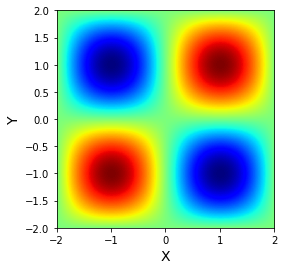

In [20]:
def sigma(x, y):
    return np.sin(0.5*np.pi*x)*np.sin(0.5*np.pi*y)

x, y = np.meshgrid(np.linspace(-2, 2, 1000), np.linspace(-2, 2, 1000))
plt.imshow(sigma(x, y), 'jet', extent = (-2, 2, -2, 2), origin = 'lower')
plt.xlabel("X"); plt.ylabel("Y")
plt.show()

We calculate the potential for this charge distribution between $-2\le x\le2$ and $-2\le y\le2$, with a grid spacing of 0.05 units.

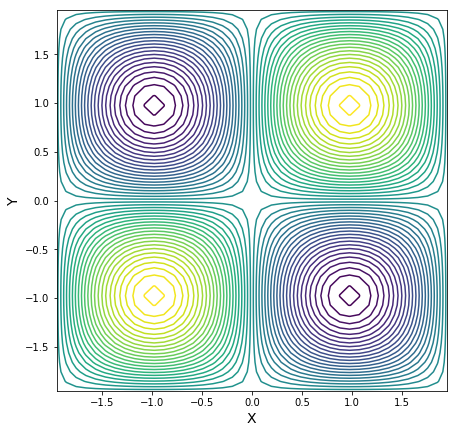

In [21]:
# initialize grid
x, y = np.meshgrid(np.arange(-2, 2.1, 0.1), np.arange(-2, 2.1, 0.1))

# calculate potential
V = potential(sigma, x, y)

#plot
plt.figure(figsize = (7, 7))
plt.contour(V, origin = 'lower', extent = [-2, 2, -2, 2], levels = np.linspace(-3, 3, 50))
plt.xlabel("X"); plt.ylabel("Y")
plt.show()

<a id = "potplot"></a>

The following then calculates the gradient of the potential to find the electric field ($\vec{E}=-\nabla V$) and plots it. The gradient is plotted using a quiver plot, the potential with contour, and the charge distribution with imshow. The electric field is perpendicular to the equipotentials and points away from positive charge and towards negative charge.

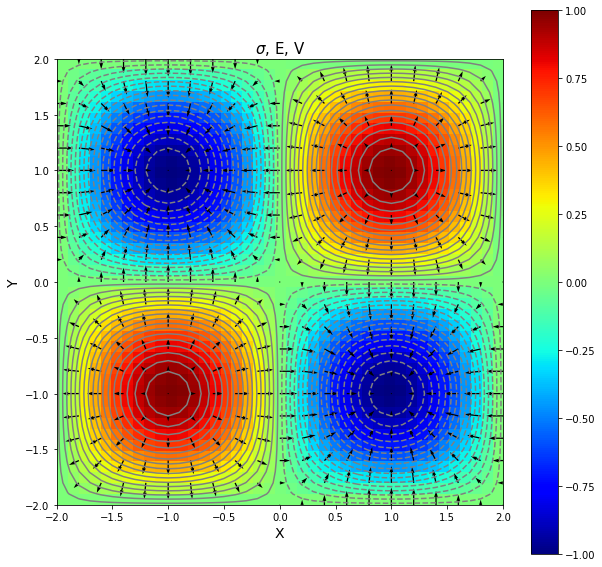

In [22]:
# calculate gradiant
ey, ex = np.gradient(-V, 0.1)

#plot
plt.figure(figsize = (10, 10))
plt.contour(V, colors = 'gray', extent = (-2, 2, -2, 2), levels = np.linspace(-3, 3, 40))
plt.imshow(sigma(x, y), 'jet', extent = (-2, 2, -2, 2), origin = 'lower')
plt.colorbar()
plt.quiver(x[::2, ::2], y[::2, ::2], ex[::2, ::2], ey[::2, ::2], color = 'black')  # plot only every 2 quiver arrows
plt.title(r"$\sigma$, E, V")
plt.xlabel("X"); plt.ylabel("Y")
plt.show()

<font size = '4'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

<a id='cp5'></a>

# Checkpoint 5: Eigenfrequencies


The following is an animation that shows a chain of four identical masses connected by five ideal springs vibrating horizontally at each of its four eigenfrequencies. We first determined the potential energy of the chain and then found the equations of motion of the four masses.

The array `M` below is a matrix of the coefficients from the equation of motion of the system, and the eigenfrequencies and eigenvectors of `M` are calculated using `linalg.eigh`. We then animate the four different motions of the system corresponding to the four different eigenfrequencies and eigenvectors.

In [23]:
M = -np.array([[-2, 1, 0, 0],
               [1, -2, 1, 0],
               [0, 1, -2, 1],
               [0, 0, 1, -2]])

values, vectors = linalg.eigh(M)

# calculates each eigenfrequencie
eigfreq1 = np.sqrt(values[0])
eigfreq2 = np.sqrt(values[1])
eigfreq3 = np.sqrt(values[2])
eigfreq4 = np.sqrt(values[3])

# each eigenvector
eigvec1 = vectors[:,0]
eigvec2 = vectors[:,1]
eigvec3 = vectors[:,2]
eigvec4 = vectors[:,3]


# animation of spring's behavior over time

fig = plt.figure(figsize = (10, 7))

def draw_spring(xi, xf):
    """
    Draws a horizontal spring.
    Inputs: xi = inital x-coordinate
            xf = final x-coordinate
    """
    dy = 0.5
    x = np.linspace(xi, xf, 23)
    y = np.array([0]*4 + [dy, 0, -dy, 0]*4 + [0]*3)
    spring = plt.Line2D(x, y, linestyle="-", color="gray", zorder=-1)
    ax = plt.gca()                      #                        ^
    ax.add_line(spring)                 # draw behind everything else


def draw_chain(x_offsets, i):
    """
    Draw a chain of five springs and four masses.
            x_offsets = Sequence of displacements from equilibrium position.
    """
    x = np.arange(2, 10, 2) + x_offsets
    
    # each eigenfrequency is plotted separately
    plt.subplot(2, 2, i)
    plt.axis("off")
    
    # draw springs
    draw_spring(0, x[0],)
    draw_spring(x[0], x[1])
    draw_spring(x[1], x[2])
    draw_spring(x[2], x[3])
    draw_spring(x[3], 10)
    
    # draw masses
    plt.plot(x, [0, 0, 0, 0], "ko", ms=8)
    
    # draw vertical edges
    plt.vlines([0, 10], -1, 1, "k", lw=5)

def animate(frame):
    fig.clear()
    
    # calculate the x-offset of each spring
    t1 = eigvec1*np.sin(eigfreq1*frame/10)
    t2 = eigvec2*np.sin(eigfreq2*frame/10)
    t3 = eigvec3*np.sin(eigfreq3*frame/10)
    t4 = eigvec4*np.sin(eigfreq3*frame/10)
    
    return draw_chain(t1, 1), draw_chain(t2, 2), draw_chain(t3, 3), draw_chain(t4, 4)

plt.axis("scaled")
anim = FuncAnimation(fig, animate, frames=100, interval = 20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

<font size = '4'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

<a id = 'cp6'></a>

# Checkpoint 6: Lagrange Points

The [Lagrange points](https://en.wikipedia.org/wiki/Lagrangian_point) are the five points located around a pair of celestial bodies where the net gravitational field is exactly zero as measured in a co-rotating reference frame (i.e. accounting for the non-inertial centrifugal force). We calculate these points for the Earth-moon system.

In a reference frame that rotates about the earth-moon system's center of mass, the effective gravitational potential is
$$V=-\frac{GM}{r_E} - \frac{Gm}{r_m} - \tfrac12 r^2 \omega^2\,$$
where $G=6.674\times10^{-11}$ m$^3$kg$^{-1}$s$^{-2}$, $M=5.974\times10^{24}$ kg is the mass of the earth, $m=7.348\times10^{22}$ kg is the mass of the moon, and $\omega=2.662\times10^{-6}$ s$^{-1}$ is the orbital angular frequency of the moon about the center of mass. $r_E$, $r_m$, and $r$ are measured from the earth, moon, and center of mass, respectively.

Below is a plot of the Earth and moon with the center of mass at (0, 0).

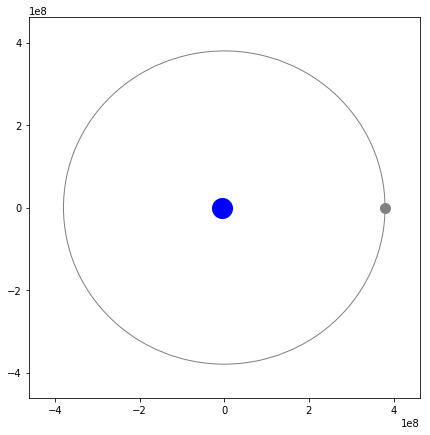

In [24]:
# define constants
G = 6.674e-11
M = 5.974e24
m = 7.348e22
w = 2.662e-6
R = 3.844e8

# distance from center of mass
rm = M/(M+m)*R
re = -m*rm/M

# plot
plt.figure(figsize = (7, 7))
ax = plt.gca()

plt.plot(rm, 0, 'o', color = 'gray', markersize = 10, label = "Moon")
plt.plot(re, 0, 'bo', markersize = 20, label = "Earth")
circle1 = plt.Circle((0, 0), radius = rm, facecolor = "None", edgecolor = "Gray")
ax.add_artist(circle1)

plt.xlim(-1.2*R, 1.2*R); plt.ylim(-1.2*R, 1.2*R)

plt.show()

<a id = "potem"></a>

<font size = 3>The function `potential(x, y)` returns the gravitational potential of the Earth-moon system at x, y.</font>

In [25]:
def potential(x, y):
    # constants
    R = 3.844e8
    G = 6.674e-11
    M = 5.974e24
    m = 7.348e22
    w = 2.662e-6
    R = 3.844e8
    
    # distance from center of mass
    xm = M/(M+m)*R
    xe = -m*xm/M
    
    ye = 0
    ym = 0
    
    r = np.sqrt(x**2 + y**2)
    re = np.sqrt((x - xe)**2 + (y - ye)**2)
    rm = np.sqrt((x - xm)**2 + (y - ym)**2)
    
    return -G*M/re - G*m/rm - 0.5*r**2*w**2

Below is a plot of the potential.

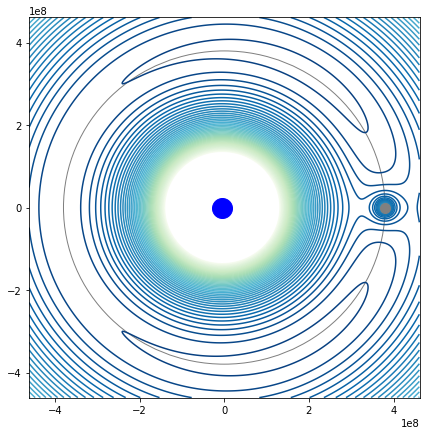

In [26]:
# constants
G = 6.674e-11
M = 5.974e24
m = 7.348e22
w = 2.662e-6
R = 3.844e8

# distance from center of mass
rm = M/(M+m)*R
re = -m*rm/M

# initialize x, y grid and set contour levels
x, y = np.meshgrid(np.linspace(-1.2*R, 1.2*R, 1000), np.linspace(-1.2*R, 1.2*R, 1000))
cont_levels = np.linspace(-0.3e7, 0, 100)

# plot
plt.figure(figsize = (7, 7))
ax = plt.gca()

plt.plot(rm, 0, 'o', color = 'gray', markersize = 10, label = "Moon")
plt.plot(re, 0, 'bo', markersize = 20, label = "Earth")

plt.contour(potential(x, y), cmap = 'GnBu', levels = cont_levels, origin = 'lower', extent = (-1.2*R, 1.2*R, -1.2*R, 1.2*R))

circle1 = plt.Circle((0, 0), radius = rm, facecolor = "None", edgecolor = "Gray")
ax.add_artist(circle1)

plt.xlim(-1.2*R, 1.2*R); plt.ylim(-1.2*R, 1.2*R)

plt.show()

<a id = "magf"></a>

<font size = 3>The following function `mag_f(xy)` calculates the magnitude of the force, which is $\vec{F} = \vec{\nabla}V$. We then found the five Lagrange points by finding local minima with Powell's method, which does not take a derivative to find a minimum.</font>

In [27]:
def mag_f(xy):
    # unpack 2-D array
    x, y = xy
    
    # constants 
    R = 3.844e8
    G = 6.674e-11
    M = 5.974e24
    m = 7.348e22
    w = 2.662e-6
    R = 3.844e8
    
    # distance from center of mass
    xm = M/(M+m)*R
    xe = -m*xm/M
    
    ye = 0
    ym = 0
    
    # derivatives of potential in the x and y directions
    x_der = -G*M*(x - xe)/((x - xe)**2 + (y - ye)**2)**1.5 - G*m*(x - xm)/((x - xm)**2 + (y - ym)**2)**1.5 + x*w**2
    y_der = -G*M*(y - ye)/((x - xe)**2 + (y - ye)**2)**1.5 - G*m*(y - ym)/((x - xm)**2 + (y - ym)**2)**1.5 + y*w**2
    
    return np.sqrt(x_der**2 + y_der**2)

# find minima
L1 = optimize.minimize(mag_f, (rm/2, 0), method = 'Powell').x
L2 = optimize.minimize(mag_f, (1.5*rm, 0), method = 'Powell').x
L3 = optimize.minimize(mag_f, (-R, 0), method = 'Powell').x
L4 = optimize.minimize(mag_f, (0, rm), method = 'Powell').x
L5 = optimize.minimize(mag_f, (0, -rm), method = 'Powell').x

<a id = "lagrange"></a>

The Earth-moon system, potential, and Lagrange points (red) are plotted together.

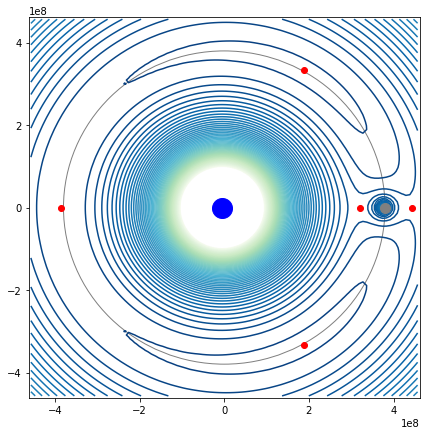

In [28]:
# constants
G = 6.674e-11
M = 5.974e24
m = 7.348e22
w = 2.662e-6
R = 3.844e8

# distance from center of mass
rm = M/(M+m)*R
re = -m*rm/M

# initialize x, y grid and set contour levels
x, y = np.meshgrid(np.linspace(-1.2*R, 1.2*R, 100), np.linspace(-1.2*R, 1.2*R, 100))
cont_levels = np.linspace(-0.4e7, 0, 100)

# list of x, y positions of Lagrange points
Lx = [L1[0], L2[0], L3[0], L4[0], L5[0]]
Ly = [L1[1], L2[1], L3[1], L4[1], L5[1]]

# plot
plt.figure(figsize = (7, 7))
ax = plt.gca()

plt.plot(rm, 0, 'o', color = 'gray', markersize = 10, label = "Moon")
plt.plot(re, 0, 'bo', markersize = 20, label = "Earth")

plt.contour(potential(x, y), cmap = 'GnBu', levels = cont_levels, origin = 'lower', extent = (-1.2*R, 1.2*R, -1.2*R, 1.2*R))

circle1 = plt.Circle((0, 0), radius = rm, facecolor = "None", edgecolor = "Gray")
ax.add_artist(circle1)

plt.plot(Lx, Ly,'ro', label = 'Lagrange points')

plt.xlim(-1.2*R, 1.2*R); plt.ylim(-1.2*R, 1.2*R)

plt.show()

<font size = '4'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

<a id = 'cp7'></a>

# Checkpoint 7: Fourier Transform of Sound


<font size = 3>Here, we did a Fourier transform on a waveform of a trumpet, stored as an array. The waveform is downloaded and displayed below.</font>

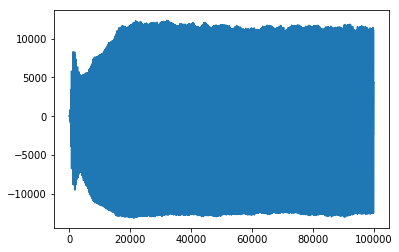

In [29]:
def _download(filename):
    """
    Download data file from the Internet and save it in the working directory
    """
    import os
    import urllib.request as url
    if not os.path.isfile(filename):
        url.urlretrieve(f"http://www.pitt.edu/~djn23/phys1321/{filename}", filename)
        
_download("trumpet.txt")

# open the file
with open("trumpet.txt") as file:
    trumpet = np.genfromtxt("trumpet.txt")

# plot the waveform
plt.plot(trumpet)
plt.show()

# play the waveform
import IPython.display as display
display.Audio(trumpet, rate=44100)

<a id = 'trumpet'></a>

<font size = 3>We perform the Fourier transform of the waveform and calculate and plot the power spectrum of the coefficients ($|c_k|^2$). The coefficients are multiples (harmonics) of 523.251 Hz.</font>

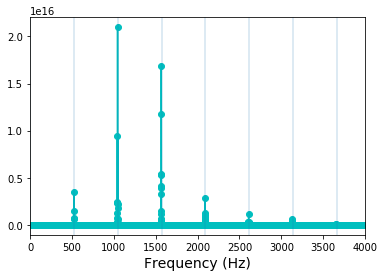

In [30]:
# calculate Fourier transform
dt = 1/44100
transf = fftpack.fft(trumpet)
fNy = 1/(2*dt)
f = np.linspace(0, fNy, len(transf)//2+1)

# plot the power specturm (only up to Nyquist frequency)
plt.figure()
plt.plot(f, np.abs(transf[:(len(transf)//2+1)])**2, 'co-')
for i in range(43):
    plt.axvline(523.251*i, alpha = 0.2)
plt.xlabel("Frequency (Hz)")
plt.xlim(0, 4000)
plt.show()

<a id = "starwars"></a>

<font size = 3>We do a similar analysis with the first chord of the theme from _Star Wars_.</font>

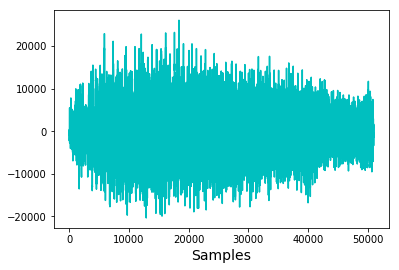

In [31]:
# download and play waveform
_download("StarWars.wav")
display.Audio("StarWars.wav")

# get data from waveform
rate, data = wavread("StarWars.wav")

# plot
plt.plot(data[19000:70000], 'c-')
plt.xlabel("Samples")
plt.show()

display.Audio(data[19000:70000], rate = rate)

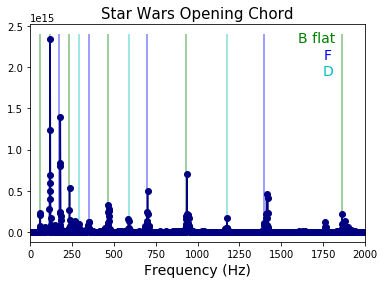

In [32]:
# calculate Fourier transform
dt = 1/rate
transf = fftpack.fft(data[19000:70000])
fNy = 1/(2*dt)
f = np.linspace(0, fNy, len(transf)//2+1)

# identify notes (bp1, bp2, f3, bp3, c4, d4, f4, bb4, d5, f5, bp5, d6, f6, a6, bp6)
notes = [58.27047, 116.5409,174.6141, 233.0819, 261.6256, 293.6648, 349.2282, 466.1638, 587.3295, 698.4565, 932.3275, 1174.659, 1396.913,1760.000, 1864.655]

bp = [0, 1, 3, 7, 10, 14]  #B flat
fn = [2, 6, 9, 12]         #F
d = [5, 8, 11]             #D

# plot power spectrum up to Nyquist frequency
plt.plot(f, np.abs(transf[:(len(transf)//2+1)])**2, 'o-', color = 'navy')

# label identified notes
for i in bp:
    plt.vlines(notes[i], ymin = 0, ymax = 2.4e15, alpha = 0.5, color = 'green')
for i in fn:
    plt.vlines(notes[i], ymin = 0, ymax = 2.4e15, alpha = 0.5, color = 'blue')
for i in d:
    plt.vlines(notes[i], ymin = 0, ymax = 2.4e15, alpha = 0.5, color = 'c')

plt.xlabel("Frequency (Hz)")
plt.text(1600, 2.3e15, "B flat", color = 'green', fontsize = 14)
plt.text(1750, 2.1e15, "F", color = 'blue', fontsize = 14)
plt.text(1745, 1.9e15, "D", color = 'c', fontsize = 14)
plt.title("Star Wars Opening Chord")
plt.xlim(0, 2000)
plt.show()

<font size = '4'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

<a id = 'cp8'></a>

# Checkpoint 8: Double Pendulum


A double pendulum consists of a normal pendulum with another pendulum hanging from its end. We consider a system for which both pendulums have bobs of the same mass $m$ and massless arms of the same length $\ell$.

The position of the arms at any moment in time is uniquely specified by the two angles $\theta_1$ and $\theta_2$ and can be described by:
$$\begin{align}
2\ddot\theta_1 + \ddot\theta_2 \cos(\theta_1-\theta_2) &+ \dot\theta_2^2 \sin(\theta_1-\theta_2) + 2{g\over\ell} \sin\theta_1 = 0\,,\\
\ddot\theta_2 + \ddot\theta_1 \cos(\theta_1-\theta_2) &- \dot\theta_1^2 \sin(\theta_1-\theta_2) + {g\over\ell} \sin\theta_2 = 0\,.
\end{align}$$

We convert these into first order equations by defining two new variables and rearranging.

$$\begin{align*}
\dot\omega_1 &= - {\omega_1^2\sin(2\theta_1-2\theta_2) + 2\omega_2^2\sin(\theta_1-\theta_2) + (g/\ell) \bigl[ \sin(\theta_1-2\theta_2) + 3 \sin\theta_1 \bigr]\over 3 - \cos(2\theta_1-2\theta_2)}, \\ \\
\dot\omega_2 &= {4\omega_1^2\sin(\theta_1-\theta_2) + \omega_2^2\sin(2\theta_1-2\theta_2) + 2(g/\ell) \bigl[ \sin(2\theta_1-\theta_2) - \sin\theta_2 \bigr]\over 3 - \cos(2\theta_1-2\theta_2)}.
\end{align*}$$

These two equations and $\dot{\theta}_1=\omega_1$ and $\dot{\theta}_2=\omega_2$ give four first-order equations that define the motion of the double pendulum.

<a id = "pendode"></a>

<font size = 3> The following solves the equations of motion from $t=0$ to $t=60$ seconds where $\ell=40\,$cm, $\theta_1=\theta_2=90^\circ$ and $\omega_1=\omega_2=0$. It returns the values of $\theta_1$, $\theta_2$, $\omega_1$, and $\omega_2$. Below is a graph of $\theta_1(t)$ and $\theta_2(t)$ </font>

In [33]:
# constants and initial conditions
g = 9.8
l = 40e-2
r0 = (np.radians(90), np.radians(90), 0, 0)
h = 0.001
t = np.arange(0, 60, h)

# first order differential equations 
def f(r, t):
    th1, th2, w1, w2 = r
    
    wd1 = -(w1**2*np.sin(2*th1 - 2*th2) + 2*w2**2*np.sin(th1 - th2) + g/l*(np.sin(th1 - 2*th2) + 3*np.sin(th1)))/(3 - np.cos(2*th1 - 2*th2))
    
    wd2 = (4*w1**2*np.sin(th1 - th2) + w2**2*np.sin(2*th1 - 2*th2) + 2*g/l*(np.sin(2*th1 - th2) - np.sin(th2)))/(3 - np.cos(2*th1 - 2*th2))
    
    return w1, w2, wd1, wd2

# use ODEINT to evaluate ODE
r = odeint(f, r0, t)
th1, th2, w1, w2 = r.T

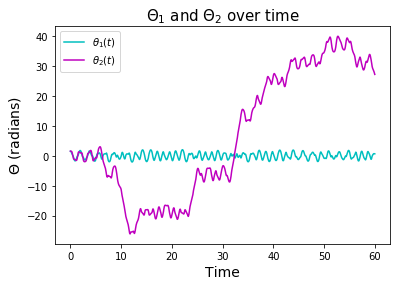

In [34]:
# plot theta1 and theta2 over time
plt.plot(t, th1, 'c-', label = r"$\theta_1(t)$")
plt.plot(t, th2, 'm-', label = r"$\theta_2(t)$")
plt.xlabel("Time", fontsize = 14)
plt.ylabel("$\Theta$ (radians)", fontsize = 14)
plt.title("$\Theta_{1}$ and $\Theta_{2}$ over time")
plt.legend(loc = 'upper left')
plt.show()

<a id = "penden"></a>

The following calculates the total energy of the system given a specified tolerance for loss of energy, where the mass of the bobs is $1\,$kg each, and makes a graph of energy as a function of time from $t=0$ to $t=100$ seconds. Because of the ODE method, some energy is lost, but it is less than $10^{-5}$ Joules.

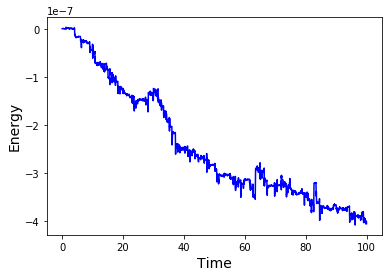

In [35]:
# plot 
g = 9.8
l = 40e-2
m = 1
r0 = (np.radians(90), np.radians(90), 0, 0)
h = 0.01
t = np.arange(0, 100, h)

# evaluate ODE with specified tolerance for energy loss
r = odeint(f, r0, t, rtol = 1.5e-10, atol = 1.5e-10)
th1, th2, w1, w2 = r.T

E = m*l**2*(w1**2 + 0.5*w2**2 + w1*w2*np.cos(th1 - th2)) - m*g*l*(2*np.cos(th1) + np.cos(th2))

plt.plot(t, E, 'b-')
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()

<a id = 'pendan'></a>

<font size = 3>The following is an animation of the pendulum in real time.</font>

In [36]:
fig = plt.figure()
pendulum1, = plt.plot([], "k-o")
pendulum2, = plt.plot([], "k-o")
plt.axis("scaled")
plt.xlim(-2.2, 2.2)
plt.ylim(-2.1, 1.5)
progress = display.ProgressBar(int(len(th1)*0.6) // 3)
progress.display()

def animate(frame):
    progress.progress += 1
    x1 = np.sin(th1[:int(len(th1)*0.6)][frame * 3])
    y1 = -np.cos(th1[:int(len(th1)*0.6)][frame * 3])
    
    x2 = np.sin(th2[:int(len(th1)*0.6)][frame * 3]) + x1
    y2 = -np.cos(th2[:int(len(th1)*0.6)][frame * 3]) + y1
    pendulum1.set_data([0, x1], [0, y1])
    pendulum2.set_data([x1, x2], [y1, y2])
    
anim = FuncAnimation(fig, animate, frames = int(len(th1)*0.6) // 3, interval = 30)
video = anim.to_html5_video()                           # ^ we need the first 60 seconds of the 100-second long array
plt.close()
display.HTML(video)

[============================================================] 2001/2000

<font size = '4'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

<a id = 'cp9'></a>

# Checkpoint 9: Standing Waves on a String

We simulate a standing wave on a string with length $L=1$ m, wave speed $v=10$ m/s, and driving amplitude $y_0=0.01$ m using the Crank-Nicolson method. We start with the string at rest and over 10 seconds, drive it in time according to $y(0,t)=y_0\sin(\omega t)$ and $v_y(0,t)=y_0\omega\cos(\omega t)\,$ for 10 seconds.

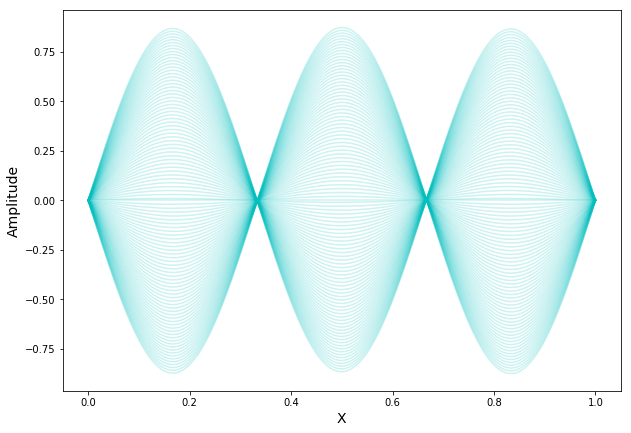

In [37]:
# constants and initial conditions
L, v, n = 1, 10, 3
a = 1e-3
x = np.arange(0, L + a, a)

h = 1e-3
time = np.arange(0, 10 + h, h)

y0 = 0.01
w = n*np.pi*v/L

y = np.zeros(len(x))
vy = np.zeros(len(x))

c = 0.25*h**2*v**2/a**2
A2 = -c
A1 = 1 + 2*c

# initialize array and fill with constant values calculated during Crank-Nicolson method
A = np.empty((3, len(x) - 2))

A[0] = A2
A[1] = A1
A[2] = A2

# evaluate ODE using Crank-Nicolson
shape = []
for i, t in enumerate(time):
    shape.append(y.copy())
    yold = y.copy()
    y[0] = y0*np.sin(w*t)
    vy[0] = y0*w*np.cos(w*t)
    b = c*y[:-2] + (1-2*c)*y[1:-1] + c*y[2:] + h*vy[1:-1]
    y[1:-1] = solve_banded((1,1), A, b) # A y' = b
    vy[1:-1] += 2*c/h*(y[0:-2] + y[2:] - 2*y[1:-1] +
                           yold[:-2] + yold[2:] - 2*yold[1:-1])

wave_part1 = shape[-1]   # wave at t = 10s

# plot the wave every 10th of a second for 10 seconds
plt.figure(figsize = (10, 7))
mask = np.arange(0, len(shape), 100)
for i in np.asarray(shape)[mask]:
    plt.plot(x, i, 'c-', alpha = 0.2)

plt.xlabel("X")
plt.ylabel("Amplitude")
plt.show() 

<a id = "dampedwave"></a>

<font size = 3>We then apply the Crank Nicholson method to the damped wave equation
$$\frac{\partial^2y}{\partial t^2}=v^2\frac{\partial^2 y}{\partial x^2} - b\frac{\partial y}{\partial t}\,,$$
where $b$ is the damping coefficient, which is a more realistic physical system.</font>

We then plot the string every tenth of a second for ten seconds. Notably, the amplitude of the string reaches ~0.20 and does not continue to grow--it is damped, unlike the example above.

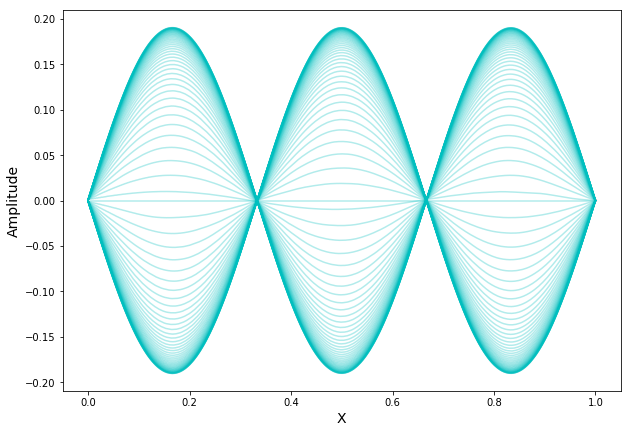

In [38]:
# constants and initial conditions
L, v, n = 1, 10, 3
a = 1e-3
b = 1
x = np.arange(0, L + a, a)

h = 1e-3
time = np.arange(0, 10 + h, h)

y0 = 0.01
w = 30*np.pi

y = np.zeros(len(x))
vy = np.zeros(len(x))

c = 0.25*h**2*v**2/a**2

A2 = -c
A1 = 1 + b*h/2 + 2*c

# initialize array and fill with constant values calculated during Crank-Nicholson method
A = np.empty((3, len(x) - 2))

A[0] = A2
A[1] = A1
A[2] = A2

# evaluate ODE using Crank-Nicholson
shape2 = []
for t in time:
    shape2.append(y.copy())
    
    yold = y.copy()
    
    y[0] = y0*np.sin(w*t)
    vy[0] = y0*w*np.cos(w*t)
    
    B = c*y[:-2] + (1 + b*h/2 - 2*c)*y[1:-1] + c*y[2:] + h*vy[1:-1]
    
    y[1:-1] = solve_banded((1,1), A, B)
    
    vy[1:-1] = (2 - b*h)/(2 + b*h)*vy[1:-1] + h*v**2/(a**2*(2 + b*h))*(y[0:-2] + y[2:] - 2*y[1:-1] + yold[:-2] + yold[2:] - 2*yold[1:-1])
    
wave_part2 = shape2[-1]    # wave at t = 10s

# plot the wave every 10th of a second for 10 seconds
plt.figure(figsize = (10, 7))
mask2 = np.arange(0, len(shape2), 100)
for i in np.asarray(shape2)[mask2]:
    plt.plot(x, i, 'c-', alpha = 0.3)
    
plt.xlabel("X")
plt.ylabel("Amplitude")
plt.show()

<a id = "timedep"></a>

We then consider a string that is driven by a time dependent driving frequency, where $\omega=2\pi t$, and animate ten seconds of this system.

In [39]:
# constants and initial conditions
L, v, n = 1, 10, 3
a = 1e-3
b = 1
x = np.arange(0, L + a, a)

h = 1e-3
time = np.arange(0, 10 + h, h)

y0 = 0.01

y = np.zeros(len(x))
vy = np.zeros(len(x))

c = 0.25*h**2*v**2/a**2
d = (1 + b*h/2)
e = (1 - b*h/2)

A2 = -c
A1 = 1 + b*h/2 + 2*c

# initialize array and fill with constant values calculated during Crank-Nicholson method
A = np.empty((3, len(x) - 2))

A[0] = A2
A[1] = A1
A[2] = A2

# evaluate ODE using Crank-Nicholson
shape2 = []
for t in time:
    shape2.append(y.copy())
    
    yold = y.copy()
    
    w = 2*np.pi*t        # frequency is no longer constant!
    
    y[0] = y0*np.sin(w*t)
    vy[0] = y0*w*np.cos(w*t)
    
    B = c*y[:-2] + (1 + b*h/2 - 2*c)*y[1:-1] + c*y[2:] + h*vy[1:-1]
    
    y[1:-1] = solve_banded((1,1), A, B) # A y' = b
    
    vy[1:-1] = (2 - b*h)/(2 + b*h)*vy[1:-1] + h*v**2/(a**2*(2 + b*h))*(y[0:-2] + y[2:] - 2*y[1:-1] + yold[:-2] + yold[2:] - 2*yold[1:-1])
    

# animate the wave over ten second range
fig = plt.figure(figsize = (8, 5))
line, = plt.plot([], 'c-')
plt.title(r"$\psi$", fontsize = 13)
plt.xlabel("X", fontsize = 13)
plt.ylabel("$Re(\psi)$", fontsize = 13)
plt.xlim(0, max(x))
plt.ylim(-0.22, 0.22)
    
def animate(frame):
    line.set_data(x, shape2[frame*20])
    
anim = FuncAnimation(fig, animate, frames = len(shape)//20, interval=20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

<font size = '4'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

<a id = 'cp10'></a>

# Checkpoint 10: Ising Model

Here we consider the [Ising Model](https://en.wikipedia.org/wiki/Ising_model) of a magnet. The function `energy(spins)` takes a lattice of spins (either up or down, +1 or -1) and calculate the energy of the lattice according to 
$$E = -\sum_{<ij>} s_i s_j\,,$$
where the notation $<ij>$ indicates a sum over unique pairs $i,j$ that are adjacent on the lattice. We also multiply the spins on the edges by the spins on the mirrored edge.

In [40]:
def energy(spins):
    E = 0
    
    rows = spins
    cols = spins.T
    
    # multiply each element by element on left, right, top, and bottom
    rowsum = rows*np.roll(rows, shift = 1, axis = 1)
    colsum = cols*np.roll(cols, shift = 1, axis = 1)

    E += np.sum(rowsum) + np.sum(colsum)
    
    return -E

We use this function to simulate the Ising model at varying temperatures.
We first construct a lattice of randomized spins, determine its energy, and then randomly select one spin. We flip that spin, calculate the energy of the new lattice, and determine whether to accept the flip and keep the new lattice using the Metropolis acceptance formula:
$$P_{i\to j} = \Bigg\lbrace\begin{array}{ll}
           1 &\qquad\mbox{if $E_j \le E_i$,} \\
           \exp\big[-(E_j-E_i)/k_BT\big] &\qquad\mbox{if $E_j > E_i$.}
         \end{array}$$

If the flip is rejected, the system stays at its original energy and another spin is randomly selected. This process is repeated 100,000 times using the function `spinflip`. We also calculate the relative magnetism of each accepted lattice $M=\frac{1}{N^2}\sum_{i=1}^{N} s_i$.

We animate the system for T = 1, T = 2, and T = 3. When T is higher, the system doesn't become as strongly magnetized in the same number of steps.

A higher T increases the probability of accepting a spin that results in a higher energy, so there it takes longer to converge to a favorable energy state where the dipoles are aligned (spins = 1 or spins = -1).

<a id = "spinflip"></a>

In [41]:
def spinflip(T, steps):
    kb = 1
    N, steps = 20, steps
    
    # initial array of random spins
    lattice = np.zeros((N, N))       
    options = [1, -1]
    for i in range(len(lattice)):
        for j in range(len(lattice)):
            lattice[i][j] = random.choice(options)
                
    spin = []
    mag = []
    
    # Ising model over a number of steps
    for step in range(steps):
        spin.append(lattice)
        mag.append(1/N**2*np.sum(lattice))
        Eold = energy(lattice)
        i = random.randint(0, len(lattice) - 1)       # choose random spin at i, j to flip
        j = random.randint(0, len(lattice.T) - 1)
        newlat = lattice.copy()                       # make a new lattice that is the same as the old except flipped spin
        newlat[i][j] = -lattice[i][j]
        Enew = energy(newlat)                         # calculate energy of new lattice
        if Eold > Enew:                               # decide whether to accept or reject the flip
            lattice = newlat
        if Eold <= Enew:
            z = random.random()
            if z < np.exp(-(Enew - Eold) / (kb*T)):
                lattice = newlat
    return spin, mag

steps = 100000

<a id = "t1"></a>
<font size = 3>Ising Model at T = 1 for 100,000 steps</font>

In [42]:
# calculate lattice and relative magnetism
spin1, mag1 = spinflip(1, steps)  

c = 800   # constant for use in animation

# animation
fig = plt.figure(figsize = (12, 5))

plt.suptitle("Magnetization at $T = 1$", fontsize = 15)

ax1 = plt.subplot(1, 2, 1)
im = plt.imshow(spin1[0], cmap = 'winter', origin = 'lower')
plt.colorbar()
plt.xlabel("X", fontsize = 13); plt.ylabel("Y", fontsize = 13)
plt.title("Lattice")

ax2 = plt.subplot(1, 2, 2)
line1, = plt.plot([], 'b-')
plt.xlim(0, steps)
plt.ylim(-1.1, 1.1)
plt.title("Magnetization", fontsize = 14)
plt.xlabel("Step", fontsize = 13); ax2.set_ylabel("M", fontsize = 13)

x = range(steps)

def animate(frame):
    
    im.set_array(spin1[frame*c])
    line1.set_data(x[:frame*c], mag1[:frame*c])
    
    return im, line1
    
anim = FuncAnimation(fig, animate, frames = steps // c, interval = 20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

<a id = "t2"></a>
<font size = 3>Ising Model at T = 2 for 100,000 steps</font>

In [43]:
# calculate lattice and relative magnetism
spin2, mag2 = spinflip(2, steps) 

# animation
fig = plt.figure(figsize = (12, 5))

plt.suptitle("Magnetization at $T = 2$", fontsize = 15)

ax1 = plt.subplot(1, 2, 1)
im = plt.imshow(spin2[0], cmap = 'winter', origin = 'lower')
plt.colorbar()
ax1.set_xlabel("X", fontsize = 13); ax1.set_ylabel("Y", fontsize = 13)
ax1.set_title("Lattice", fontsize = 14)

ax2 = plt.subplot(1, 2, 2)
line1, = plt.plot([], 'b-')
ax2.set_xlim(0, steps)
ax2.set_ylim(-1.1, 1.1)
ax2.set_title("Magnetization", fontsize = 14)
ax2.set_xlabel("Step", fontsize = 13); ax2.set_ylabel("M", fontsize = 13)

x = range(steps)

def animate(frame):
    
    im.set_array(spin2[frame*c])
    line1.set_data(x[:frame*c], mag2[:frame*c])
    
    return im, line1
    
anim = FuncAnimation(fig, animate, frames = steps // c, interval = 20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

<a id = "t3"></a>
<font size = 3>Ising Model at T = 3 for 100,000 steps</font>

In [44]:
# calculate lattice and relative magnetism
spin3, mag3 = spinflip(3, steps) 

# animation
fig = plt.figure(figsize = (12, 5))

plt.suptitle("Magnetization at $T = 3$", fontsize = 15)

ax1 = plt.subplot(1, 2, 1)
im = plt.imshow(spin3[0], cmap = 'winter', origin = 'lower')
plt.colorbar()
ax1.set_xlabel("X", fontsize = 13); ax1.set_ylabel("Y", fontsize = 13)
ax1.set_title("Lattice", fontsize = 14)

ax2 = plt.subplot(1, 2, 2)
line1, = plt.plot([], 'b-')
ax2.set_xlim(0, steps)
ax2.set_ylim(-1.1, 1.1)
ax2.set_title("Magnetization", fontsize = 14)
ax2.set_xlabel("Step", fontsize = 13); ax2.set_ylabel("M", fontsize = 13)

x = range(steps)

def animate(frame):
    
    im.set_array(spin3[frame*c])
    line1.set_data(x[:frame*c], mag3[:frame*c])
    
    return im, line1
    
anim = FuncAnimation(fig, animate, frames = steps // c, interval = 20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

<font size = '4'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

### Contact meh187@pitt.edu with questions, comments, or problems.